### Análise da Mídia Social Twitter: contas @netflix e @NetflixBrasil e #winx
##### Este trabalho analisa a rede social Twitter utilizando sua API, as contas @netflix e @NetflixBrasil e a #winx, a fim de levantar o impacto da empresa Netflix tem no país e no mundo em relação ao anúncio de uma nova produção em cartaz. É pretendido analisar questões como tempo demandado para alcançar 1.000 tweets, polaridade e outras _hashtags_ que acompanham a #winx.

## Questões de Pesquisa
1) Quanto tempo levou para a #winx alcançar 200 tweets nas contas da @netflix e @NetflixBrasil?

2) Durante o primeiro dia, em suma, sobre o que os tweets falavam da #winx? Quais foram as palavras que mais apareceram?

3) Quais outras hashtags apareceram em conjunto da #winx durante o primeiro dia?

4) Tratando-se de polaridade, quais são os tweets que apresentam polaridades mais positivas?

5) Em relação à polaridade, quais são os tweets que apresentam polaridades mais negativas?

6) Qual a média de sentimento dos tweets que contam com a #winx?

7) Quais outras hashtags podem ser encontradas nos tweets que falam sobre #winx?

> Extra

8) Quais são os retweets mais populares que falam sobre #winx?

### Importações de bibliotecas

In [2]:
import tweepy
import twitter
from textblob import TextBlob as tb
from wordcloud import WordCloud

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

from collections import Counter
from prettytable import PrettyTable

### Definição das figuras

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

### Configuração das credenciais da API do Twitter

In [4]:
config = pd.read_csv("../keys twitter.csv", sep=";")
twitterApiKey = config['twitterApiKey'][0]
twitterApiSecret = config['twitterApiSecret'][0]
twitterApiAccessToken = config['twitterApiAccessToken'][0]
twitterApiAccessTokenSecret = config['twitterApiAccessTokenSecret'][0]

config2 = pd.read_csv("../keys twitter_adm.csv", sep=";")
CONSUMER_KEY = config2['twitterApiKey'][0]
CONSUMER_SECRET = config2['twitterApiSecret'][0]
OAUTH_TOKEN = config2['twitterApiAccessToken'][0]
OAUTH_TOKEN_SECRET = config2['twitterApiAccessTokenSecret'][0]

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

print(twitter_api)

### Autenticação

In [5]:
auth = tweepy.OAuthHandler(twitterApiKey, twitterApiSecret)
auth.set_access_token(twitterApiAccessToken, twitterApiAccessTokenSecret)
twetterApi = tweepy.API(auth, wait_on_rate_limit = True)

### Conta(s) em foco

In [6]:
account1 = "netflix"
account2 = "NetflixBrasil"

In [7]:
tweets1 = tweepy.Cursor(twetterApi.user_timeline, 
                        screen_name=account1, 
                        count=None,
                        since_id=None,
                        max_id=None,
                        trim_user=True,
                        exclude_replies=True,
                        contributor_details=False,
                        include_entities=False
                        ).items(2000);

tweets2 = tweepy.Cursor(twetterApi.user_timeline, 
                        screen_name=account2, 
                        count=None,
                        since_id=None,
                        max_id=None,
                        trim_user=True,
                        exclude_replies=True,
                        contributor_details=False,
                        include_entities=False
                        ).items(2000);

In [8]:
#Account1
df1 = pd.DataFrame(data=[tweet.text for tweet in tweets1], columns=['Tweet'])

#Account2
df2 = pd.DataFrame(data=[tweet.text for tweet in tweets2], columns=['Tweet'])


In [9]:
pd.set_option('display.max_colwidth', 240)

print('Netflix')
df1.head()

Netflix


,Tweet
0,"RT @strongblacklead: This is just the opening scene and I'm already on the FLOOR! @ViolaDavis's portrayal of Ma Rainey’s audacity, stage pr…"
1,RT @thedanieb: Can’t wait to watch Ma Rainey’s Black Bottom Friday!!
2,RT @JayPharoah: Let's goo🙏🏾🙏🏾 https://t.co/Pb6Ii9zEs0
3,RT @GiaPeppers: Chadwick is incredible in this. The entire cast is. https://t.co/NeqOVKxjkW
4,RT @iamjimkelly: Chadwick Boseman legit learned how to play the trumpet 🎺 for his role in Ma Rainey's Black Bottom. His acting genius. 😭 ht…


In [10]:
print('Netflix Brasil')
df2.head()

Netflix Brasil


,Tweet
0,"Pega esse elenco de Lulli, o mais novo filme com a @larimanoela.\n\nAntes que me perguntem, ainda não tenho datas, va… https://t.co/v09C2M5VYF"
1,"Se emocionou com os 12 minutos de Se Algo Acontecer... Te Amo? Então você vai gostar de Canvas, meu novo curta-metr… https://t.co/YQ1l0arNog"
2,"Não posso te dar um namoradinho, mas um recap da primeira temporada de Namorado de Natal eu posso, sim. 💕 https://t.co/qclAXh9KL1"
3,"Fiz um teste aqui e percebi que meu coração aguenta um filme com Wagner Moura, Ryan Gosling, Chris Evans, Jessica H… https://t.co/xYqjDNfOUC"
4,Hoje é aniversário da maravilhosa Sarah Paulson❤️\nE nesse tweet tá liberado vocês pedirem pra eu avisar qualquer co… https://t.co/tqeKmCtg1g


### Análise de Sentimento
#### Funções de Subjetividade e Polaridade

In [13]:
def getTextSubjectivity(txt):
    return tb(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return tb(txt).sentiment.polarity

In [14]:
# Aplicando funções nos dataframes

df1['Subjectivity'] = df1['Tweet'].apply(getTextSubjectivity)
df1['Polarity'] = df1['Tweet'].apply(getTextPolarity)

df2['Subjectivity'] = df2['Tweet'].apply(getTextSubjectivity)
df2['Polarity'] = df2['Tweet'].apply(getTextPolarity)


In [15]:
# Função para categorizar Tweets em Positivos, Negativos e Neutros.
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

In [16]:
# Aplicando função de categorização nos dataframes
df1['Score'] = df1['Polarity'].apply(getTextAnalysis)

df2['Score'] = df2['Polarity'].apply(getTextAnalysis)

In [17]:
df1.head()

,Tweet,Subjectivity,Polarity,Score
0,"RT @strongblacklead: This is just the opening scene and I'm already on the FLOOR! @ViolaDavis's portrayal of Ma Rainey’s audacity, stage pr…",0.000000,0.000000,Neutral
1,RT @thedanieb: Can’t wait to watch Ma Rainey’s Black Bottom Friday!!,0.433333,-0.260417,Negative
2,RT @JayPharoah: Let's goo🙏🏾🙏🏾 https://t.co/Pb6Ii9zEs0,0.000000,0.000000,Neutral
3,RT @GiaPeppers: Chadwick is incredible in this. The entire cast is. https://t.co/NeqOVKxjkW,0.762500,0.450000,Positive
4,RT @iamjimkelly: Chadwick Boseman legit learned how to play the trumpet 🎺 for his role in Ma Rainey's Black Bottom. His acting genius. 😭 ht…,0.216667,-0.083333,Negative


In [18]:
df2.head()

,Tweet,Subjectivity,Polarity,Score
0,"Pega esse elenco de Lulli, o mais novo filme com a @larimanoela.\n\nAntes que me perguntem, ainda não tenho datas, va… https://t.co/v09C2M5VYF",0.0,0.0,Neutral
1,"Se emocionou com os 12 minutos de Se Algo Acontecer... Te Amo? Então você vai gostar de Canvas, meu novo curta-metr… https://t.co/YQ1l0arNog",0.0,0.0,Neutral
2,"Não posso te dar um namoradinho, mas um recap da primeira temporada de Namorado de Natal eu posso, sim. 💕 https://t.co/qclAXh9KL1",0.0,0.0,Neutral
3,"Fiz um teste aqui e percebi que meu coração aguenta um filme com Wagner Moura, Ryan Gosling, Chris Evans, Jessica H… https://t.co/xYqjDNfOUC",0.0,0.0,Neutral
4,Hoje é aniversário da maravilhosa Sarah Paulson❤️\nE nesse tweet tá liberado vocês pedirem pra eu avisar qualquer co… https://t.co/tqeKmCtg1g,0.0,0.0,Neutral


### Limpeza de dados

In [19]:
# Cleaning the tweets

def limparTweet(txt):
    # Remove mentions
     txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    # Remove hashtags
     txt = re.sub(r'#', '', txt)
    # Remove retweets:
     txt = re.sub(r'RT : ', '', txt)
    # Remove urls
     txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
     return txt


def limparUrl(txt):
    # Remove mentions
     txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    # Remove hashtags
     txt = re.sub(r'#', '', txt)
    # Remove retweets:
     txt = re.sub(r'RT : ', '', txt)
    # Remove urls
     txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
     return txt

In [20]:
df1['Tweet'] = df1['Tweet'].apply(limparUrl)

df2['Tweet'] = df2['Tweet'].apply(limparUrl)


### Removendo linhas vazias 

In [21]:
df1 = df1.drop(df1[df1['Tweet'] == ''].index)

df2 = df2.drop(df2[df2['Tweet'] == ''].index)


In [18]:
import json

# Set this variable to a trending topic,  or anything else for that matter. 

query = '#winx' 

count = 200

# See https://dev.twitter.com/docs/api/1.1/get/search/tweets
search_results = twitter_api.search.tweets(q=query, count=count)

print (type(search_results))
print()
print (json.dumps(search_results, indent=2))

<class 'twitter.api.TwitterDictResponse'>

{
  "statuses": [
    {
      "created_at": "Fri Dec 18 12:11:28 +0000 2020",
      "id": 1339906121834897410,
      "id_str": "1339906121834897410",
      "text": "RT @SinfulHime: Who cares about those fairy losers? \nYou didn't forget us, did you? #winx https://t.co/2bZYhJskNy",
      "truncated": false,
      "entities": {
        "hashtags": [
          {
            "text": "winx",
            "indices": [
              84,
              89
            ]
          }
        ],
        "symbols": [],
        "user_mentions": [
          {
            "screen_name": "SinfulHime",
            "name": "SinfulHime\u2726",
            "id": 2575114279,
            "id_str": "2575114279",
            "indices": [
              3,
              14
            ]
          }
        ],
        "urls": [],
        "media": [
          {
            "id": 1339410627656355842,
            "id_str": "1339410627656355842",
            "indices": [
     

### Análise de Dados

#### 1) Em suma, sobre os tweets da conta @netflix, quais foram as palavras que mais apareceram?

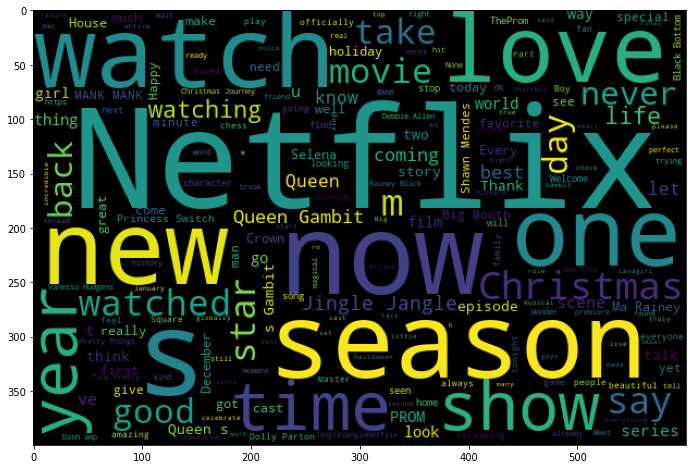

In [24]:
df_netflix = df1
df_netflix = df_netflix['Tweet'].apply(limparTweet)
    
words = ' '.join([tweet for tweet in df_netflix])
wordCloud = WordCloud(width=600, height=400).generate(words)

plt.imshow(wordCloud)
plt.show()

#### 2) Em suma, sobre os tweets da conta @NetflixBrasil, quais foram as palavras que mais apareceram?

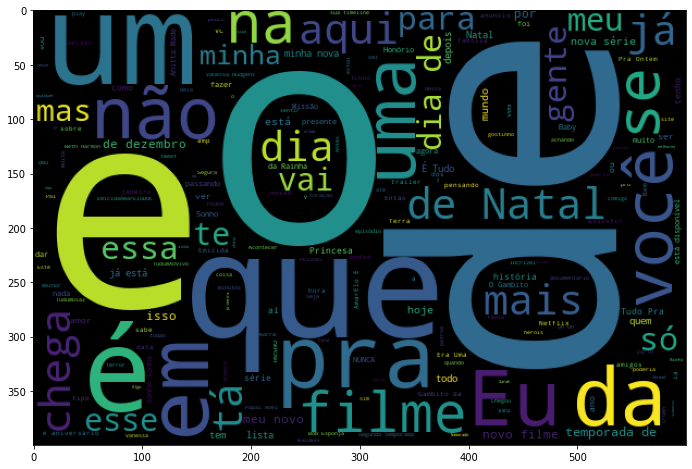

In [22]:
df_netflixBr = df2
df_netflixBr = df_netflixBr['Tweet'].apply(limparTweet)
    
words = ' '.join([tweet for tweet in df_netflixBr])
wordCloud = WordCloud(width=600, height=400).generate(words)

plt.imshow(wordCloud)
plt.show()

#### 3) Quais outras hashtags apareceram em conjunto da #winx?

In [51]:
status_texts = [ status['text'] 
                   for status in statuses ]

    
statuses = search_results['statuses']

t = statuses[0]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

for item in [hashtags]:
    c = Counter(item)

    
words = [ w 
          for t in status_texts 
              for w in t.split() ]

for label, data in (('Palavras', words), 
                    ('Hashtags', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r'
    print(pt)

+-------------------+-------+
| Palavras          | Count |
+-------------------+-------+
| RT                |    97 |
| #winx             |    60 |
| gay               |    60 |
| make              |    35 |
| to                |    34 |
| i                 |    33 |
| so                |    32 |
| every             |    32 |
| have              |    31 |
| @mackenziedravis: |    30 |
+-------------------+-------+
+-----------------+-------+
| Hashtags        | Count |
+-----------------+-------+
| winx            |    65 |
| Winx            |    14 |
| winxclub        |    13 |
| WinxClub        |    11 |
| WINX            |    10 |
| myart           |     4 |
| Winxnetflix     |     3 |
| FateTheWinxSaga |     1 |
| WIP             |     1 |
| WinxNetflix     |     1 |
+-----------------+-------+


### Análise de Sentimento dos Tweets

<BarContainer object of 3 artists>

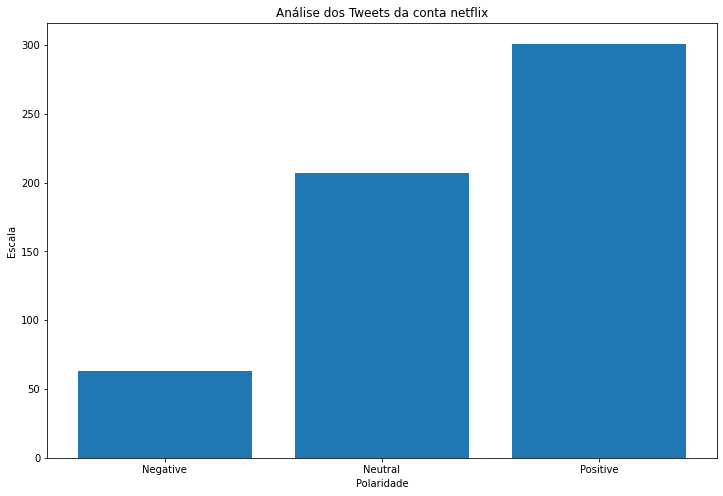

In [28]:
# netflix

labels = df1.groupby('Score').count().index.values

values = df1.groupby('Score').size().values


plt.xlabel('Polaridade')
plt.ylabel('Escala')
plt.title('Análise dos Tweets da conta netflix')
plt.bar(labels, values)

<BarContainer object of 3 artists>

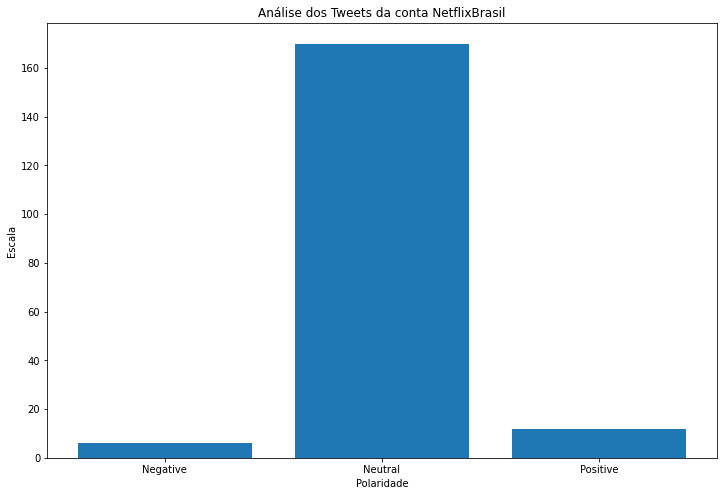

In [29]:
# NetflixBrasil

labels = df2.groupby('Score').count().index.values

values = df2.groupby('Score').size().values

plt.xlabel('Polaridade')
plt.ylabel('Escala')
plt.title('Análise dos Tweets da conta NetflixBrasil')
plt.bar(labels, values)

#### 4) Tratando-se de polaridade, quais são os tweets que apresentam polaridades mais positivas?

In [106]:
# netflix
df1_ordenado = df1.sort_values(by ='Polarity', ascending = False)
df1_ordenado.head()

,Tweet,Subjectivity,Polarity,Score
74,As we celebrate Ryan Murphy’s THE PROM make sure we give Ariana DeBose her flowers!!! An Afro-Puerto Rican actor taking…,0.888889,0.976562,Positive
35,. is now streaming on and our episode on how we made “Love Again” is OUT NOW!!! 🤍 …,0.600000,0.976562,Positive
59,"In 2020, there has been a 215% increase in the sale of chess sets.\n\nBeth Harmon would be proud.",1.000000,0.800000,Positive
131,This is a Natalie () stan account!!,0.500000,0.781250,Positive
104,It’s a wonderful life when you’ve got two-day shipping and friends like HOLIDATE co-stars Emma Roberts and Kristin Chenoweth for…,0.750000,0.750000,Positive


In [107]:
# NetflixBrasil
df2_ordenado = df2.sort_values(by ='Polarity', ascending = False)
df2_ordenado.head()

,Tweet,Subjectivity,Polarity,Score
130,Love ❌\nCarinho ❌\nBeijinho ❌\nConchinha ❌\nAssistir uma comédia romântica e dormir sozinha ✅,0.600000,0.500000,Positive
1,"Ok, vamos lá: thread com os melhores trocadilhos com o título O Gambito da Rainha.",0.500000,0.500000,Positive
0,"Mistério, crime, folclore brasileiro: minha nova série original com o e a tem tudo. Criad…",0.750000,0.375000,Positive
52,"Você só vai estar a salvo da minha nova série coreana de terror, Sweet Home, até dia 18 de dezembro. Depois não tem…",0.650000,0.350000,Positive
5,"My new series, Anitta: Made In Honório, is now available on / for you to binge-watch!\n\nMi nueva serie,…",0.427273,0.318182,Positive


#### 5) Em relação à polaridade, quais são os tweets que apresentam polaridades mais negativas?

In [108]:
# netflix
df1_ordenado = df1.sort_values(by ='Polarity', ascending = True)
df1_ordenado.head()

,Tweet,Subjectivity,Polarity,Score
152,[watching Mank with my boyfriend]\n\n[Mank appears on screen]\n\nME: that's mank,1.000,-0.750,Negative
155,"[ waiting room]\n\nMe: [chanting] Mank, Mank-\n\nOthers in lobby: Mank, MANK\n\nSecretary: [pounding her clipboard] MA…",1.000,-0.750,Negative
100,sorry time but this is my person of the year,1.000,-0.500,Negative
63,"Give it some ZAZZ \nIs it wrong of me to suggest your Saturday night viewing be ....🤓🌈💜\n\nRainbows, Sparkles,…",0.900,-0.500,Negative
69,"Pedro Pascal stars in Prospect, a sci-fi thriller about alien planets, an unlikely alliance, and doing whatever it…",0.625,-0.375,Negative


In [109]:
# NetflixBrasil
df2_ordenado = df2.sort_values(by ='Polarity', ascending = True)
df2_ordenado.head()

,Tweet,Subjectivity,Polarity,Score
125,"Aff, Chiquititas no Top 10? Nunca assistiria isso. \n\nⓘ 𝗙𝗼𝗻𝘁𝗲𝘀 𝗼𝗳𝗶𝗰𝗶𝗮𝗶𝘀 𝗮𝗳𝗶𝗿𝗺𝗮𝗿𝗮𝗺 𝗾𝘂𝗲 𝗶𝘀𝘀𝗼 𝗳𝗼𝗶 𝗳𝗮𝗹𝘀𝗼 𝗲 𝗲𝗻𝗴𝗮𝗻𝗼𝘀𝗼",0.500000,-0.250000,Negative
61,"Aqui se fala, aqui se faz. A nova dublagem de Seven Deadly Sins: A Ira Imperial dos Deuses já está disponível.…",0.400000,-0.200000,Negative
97,"Cara Gente Branca é uma série de ficção que conta histórias reais. Uma delas é a de Reggie Green, um estudante que…",0.300000,-0.200000,Negative
106,Little Witch Academia é o anime que a gente precisava pra dar uma relaxada: \n\n- Akko é uma bruxinha atrapalhada bus…,0.500000,-0.187500,Negative
92,Orphan Black (2020),0.433333,-0.166667,Negative


#### 6) Qual a média de sentimento dos tweets que contam com a #winx?

In [97]:
public_tweets = twetterApi.search('#winx')

#Variável que irá armazenar as polaridades
analysis = None

tweets = [] # Lista vazia para armazenar scores
for tweet in public_tweets:
    analysis = tb(tweet.text)
    polarity = analysis.sentiment.polarity
    tweets.append(polarity)
   
    
print('MÉDIA DE SENTIMENTO: ' + str(np.mean(tweets)))

MÉDIA DE SENTIMENTO: -0.11802083333333332


#### 7) Quais são os retweets mais populares que falam sobre #winx?